# Everything Counts Assignment 2

The Github repository is available at:
< NEED TO ADD THE GITHUB REPO >

## Introduction



## Loading the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv("./data/natureupclose_data.csv", encoding='ISO-8859-1')

## Hypothesis 1

Hughes et al. (2019) found a difference in levels of nature connection between males and females. Females reported higher levels of nature connection. The dataset will be tested to see if the data is consistent with these observations.

The variable `NR6sum_pre` is a sum of six components of Nature Relatedness scale taken in the pre-survey. This provides an indicator of a participants nature connectedness pre-intervention. 

$H_0$: There is no difference in the variable `NR6sum_pre` between male participants and female participants.

$H_A$: The variable `NR6sum_pre` is higher for female participants than male participants.


In [2]:
df['Sex'].unique()
df['Sex'].value_counts()

Sex
Female                 1042
Male                    238
Prefer not to say         9
Other                     5
Other, please state       1
Name: count, dtype: int64

The dataset contains more values than `Male` and `Female` in the `Sex` column. Only observations of `Male` and `Female` will be selected because this is the hypothesis based on Hughes et al. (2019).

In [3]:
male_and_female_observations = df[df['Sex'].isin(['Male', 'Female'])]

In [4]:
male_and_female_observations['Sex_integer'] = male_and_female_observations['Sex'].map({'Male': 1, 'Female': 0})


<Axes: xlabel='Sex', ylabel='NR6sum_pre'>

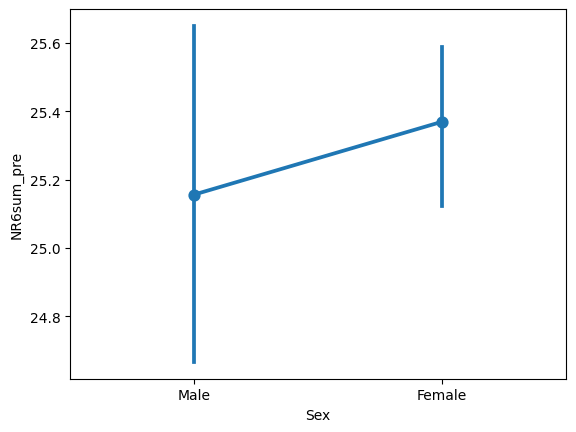

In [5]:


sns.pointplot(x = 'Sex', y = 'NR6sum_pre', data = male_and_female_observations)

The figure above shows that female participants do have a higher NR6sum_pre score. 

In [6]:
m_full = sm.formula.ols(formula = 'NR6sum_pre ~  Sex_integer', data = male_and_female_observations)

multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             NR6sum_pre   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5882
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.443
Time:                        17:54:42   Log-Likelihood:                -3543.2
No. Observations:                1279   AIC:                             7090.
Df Residuals:                    1277   BIC:                             7101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      25.3695      0.120    211.850      

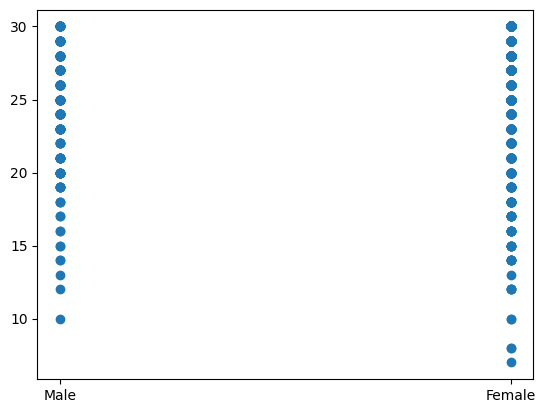

In [7]:
plt.scatter(x='Sex', y='NR6sum_pre', data=male_and_female_observations)

In [8]:
import scipy.stats as stats
import numpy as np

# Create separate male and female groups and remove any missing values
males = male_and_female_observations[male_and_female_observations['Sex'] == 'Male']['NR6sum_pre'].dropna()
females = male_and_female_observations[male_and_female_observations['Sex'] == 'Female']['NR6sum_pre'].dropna()

# Complete a one-sided T-Test on the groups
t_stat, p_value = stats.ttest_ind(females, males, alternative='greater')
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 0.7669674706793618, p-value: 0.2216213121939779


Since p-value is `0.221` the null hypothesis cannot be rejected. The dataset shows no significant difference in the `NR6sum_pre` variable between male and female participants. 

Despite what the pairplot shows us in <TODO:INCLUDE FIGURE NUMBER> the data cannot be relied upon to and not down to randomness in the dataset.

## Hypothesis 2

Richardson et al. (2021) suggest that noticing nature explains higher levels of nature connectedness. The dataset contains data from an experiment where participants were asked to complete different activities in nature environments. 

The `NR6sum_pre` and `NR6sum_post` variables are an indicator of nature connectedness. 

$H_0$: There is no mean change between `NR6sum_pre` and `NR6sum_post` for participants that notice nature.

$H_A$: The mean change between `NR6sum_pre` and `NR6sum_post` is different for participants that notice nature than participants than don't.

Since the `NR6sum_post` variable will only be valid for participants that met the inclusion criteria, participants that didn't meet the critera will be excluded.


In [9]:
df['conditiontypetext'].value_counts()

conditiontypetext
combined          433
citsci            430
control           216
noticingnature    216
Name: count, dtype: int64

In [10]:
# Calculating the difference in NR6sum values between pre- and post-survey
df['NR6sum_diff'] = df['NR6sum_post'] - df['NR6sum_pre']

In [11]:
df['NR6sum_diff']

0       0.0
1       1.0
2      -2.0
3       1.0
4       1.0
       ... 
1290    NaN
1291    NaN
1292    NaN
1293    NaN
1294    NaN
Name: NR6sum_diff, Length: 1295, dtype: float64

In [12]:
# Only people that completed all the critera
df_with_full_participation = df[ df['Participant'] == 1 ]

df_with_full_participation['NR6sum_diff']

0      0.0
1      1.0
2     -2.0
3      1.0
4      1.0
      ... 
495    0.0
496   -1.0
497    0.0
498   -1.0
499    0.0
Name: NR6sum_diff, Length: 500, dtype: float64

In [13]:
control_group = df_with_full_participation[ df_with_full_participation['conditiontypetext'] == 'control' ]['NR6sum_diff']
noticing_nature_group = df_with_full_participation[ df_with_full_participation['conditiontypetext'] == 'noticingnature' ]['NR6sum_diff']

# df['conditiontypetext']
# control           216
# noticingnature    216

# Complete a T-Test on the groups
t_stat, p_value = stats.ttest_ind(noticing_nature_group, control_group)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# noticing_nature_group

T-statistic: 2.8794200300533577, p-value: 0.004368466519549251


The p-value is `0.004368466519549251` and less than 0.05 the null hypothesis is rejected.

These data support the findings by Richardson et al. (2021).

In [14]:
print(control_group.mean())
print(noticing_nature_group.mean())

0.025210084033613446
0.8981481481481481


<Axes: xlabel='conditiontypetext', ylabel='NR6sum_diff'>

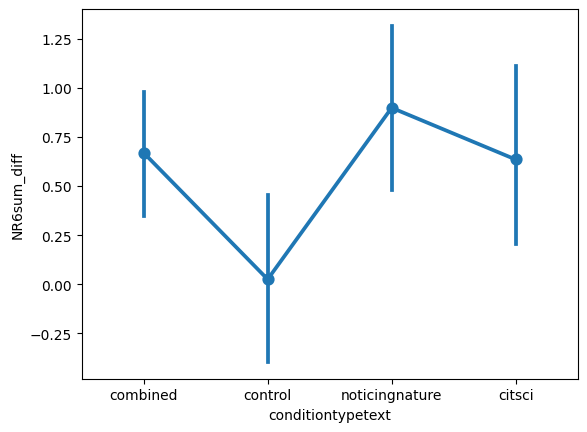

In [15]:

# TODO: Get this down to only the variables we care about
sns.pointplot(x = 'conditiontypetext', y = 'NR6sum_diff', data = df_with_full_participation)

## Hypothesis 3

Although the variable in our dataset (PROCOBS_pre) is different from pro-environmental behaviours, both have overlapping elements (Barbett et al, 2020).

// TODO: Include some references or takes on pro-environmental behaviour

Age, Sex and Health are predictors for pro-nature conservation behaviour. 

Older people are more likely to recognise the need to preserve nature. They have experienced how human action can change or even worsen nature.

People that are healthier have the abilities and energy to get outside and enjoy nature.

And as mentioned previously, females have an increased relatedness to nature and typically nurturing nature. So would  

$H_0$: Age, sex and health are not predictors for pro-nature conservation behaviour.

$H_A$: Age, sex and health are predictors for pro-nature conservation behaviour.


Futher study: personality on pro-nature conservation behaviour.

In [16]:
df.columns

Index(['PersonID', 'LineSurvey1', 'ResponseIDSurvey1', 'DateSurvey1',
       'LineSurvey2', 'ResponseIDSurvey2', 'DateSurvey2', 'Participant',
       'INS_pre', 'INS_post', 'NR6sum_pre', 'NR6sum_post',
       'SatisfiedWithLife_pre', 'SatisfiedWithLife_post', 'WorthwhileLife_pre',
       'WorthwhileLife_post', 'PROCOBScivilaction_pre', 'PROCOBSgarden_pre',
       'PROCOBS_pre', 'PROCOBScivilaction_post', 'PROCOBSgarden_post',
       'PROCOBS_post', 'Health_pre', 'Health_post', 'Happiness_pre',
       'Happiness_post', 'Age', 'Age_comments', 'Sex', 'Ethnicgroup',
       'spendtimeoutsideatleastafewtimesperweek', 'postcode', 'condition',
       'conditiontext', 'conditiontypetext', 'Engagementwiththetask',
       'Ifeltclosetonaturethroughmysenses', 'Ifoundtakingpartcalmingorjoyful',
       'Inoticedthebeautyofnaturewhilsttakingpart',
       'Ifoundtakingpartmeaningful', 'Ifeltiwashelpingtotakecareofnature',
       'Ifoundtakingpartfrustrating', 'Timespentoutsideduringthetask',
       'H

In [17]:
# df.columns

df['PROCOBS_pre'].value_counts()

PROCOBS_pre
42.0    66
38.0    51
37.0    49
33.0    47
35.0    46
36.0    46
40.0    43
43.0    42
45.0    42
44.0    41
39.0    38
34.0    37
31.0    36
41.0    36
49.0    34
27.0    33
28.0    32
32.0    31
29.0    28
48.0    28
46.0    28
24.0    27
30.0    26
50.0    24
25.0    24
26.0    23
47.0    22
51.0    21
52.0    17
21.0    16
23.0    14
20.0    14
53.0    12
22.0    12
17.0    10
54.0     9
18.0     8
19.0     6
16.0     6
13.0     6
55.0     5
15.0     3
12.0     3
10.0     2
11.0     2
56.0     2
14.0     2
9.0      1
8.0      1
Name: count, dtype: int64

In [18]:
m_full = sm.formula.ols(formula = 'PROCOBS_pre ~  Age + Health_pre + Sex', data = df)

multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            PROCOBS_pre   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     14.28
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           9.74e-16
Time:                        17:54:42   Log-Likelihood:                -4146.6
No. Observations:                1144   AIC:                             8307.
Df Residuals:                    1137   BIC:                             8343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Interpreting the model

The predictors of sex (male), age, health_pre are significant and have p-values lower than 0.05. The additional sex variables are not significant predictors. 

The model has an F-statistic of 14.28. Showing the model strongly predicts for PROCOBS_pre. And has a p-value lower than 0.05 (1.97e-23) making it discernible. 



<Axes: xlabel='Sex', ylabel='PROCOBS_pre'>

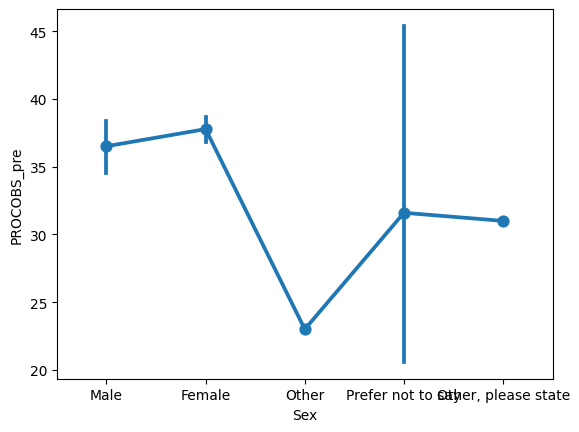

In [19]:
sns.pointplot(x = 'Sex', y = 'PROCOBS_pre', data = df_with_full_participation)

<Axes: xlabel='Age', ylabel='PROCOBS_pre'>

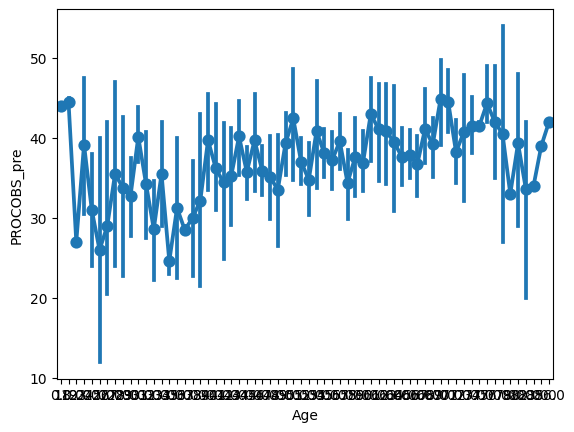

In [20]:
sns.pointplot(x = 'Age', y = 'PROCOBS_pre', data = df_with_full_participation)

<Axes: xlabel='Health_pre', ylabel='PROCOBS_pre'>

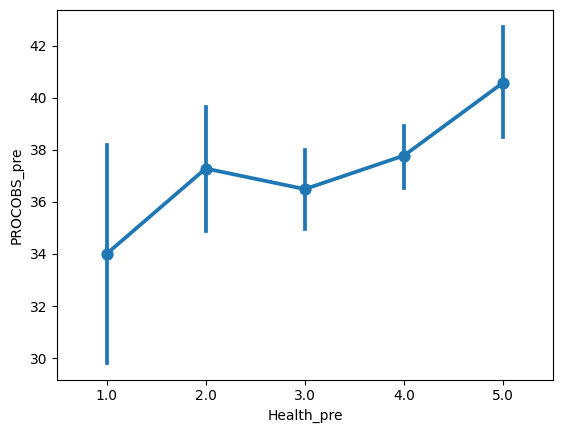

In [21]:
sns.pointplot(x = 'Health_pre', y = 'PROCOBS_pre', data = df_with_full_participation)

<Axes: xlabel='spendtimeoutsideatleastafewtimesperweek', ylabel='PROCOBS_pre'>

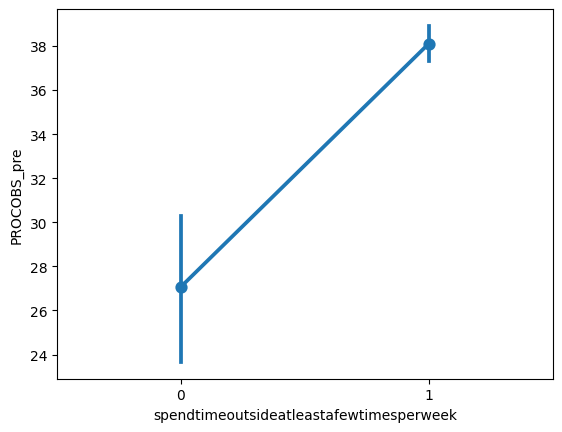

In [22]:
sns.pointplot(x = 'spendtimeoutsideatleastafewtimesperweek', y = 'PROCOBS_pre', data = df_with_full_participation)

In [23]:
m_full = sm.formula.ols(formula = 'NR6sum_diff ~  spendtimeoutsideatleastafewtimesperweek', data = df_with_full_participation)

multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:            NR6sum_diff   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.515
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.113
Time:                        17:54:43   Log-Likelihood:                -1131.1
No. Observations:                 500   AIC:                             2266.
Df Residuals:                     498   BIC:                             2275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

## References

Barbett, L., Stupple, E. J. N., Sweet, M., Schofield, M. B., & Richardson, M. (2020). Measuring actions for nature—Development and validation of a pro-nature conservation behaviour scale. Sustainability, 12(12), 4885. https://doi.org/10.3390/su12124885

Hughes, J., Rogerson, M., Barton, J., & Bragg, R. (2019). Age and connection to nature: When is engagement critical? Frontiers in Ecology and the Environment. Ecological Society of America. https://doi.org/10.1002/fee.2035

Richardson, Miles, Hamlin, Iain, Butler, Carly, Thomas, Rory and Hunt, Alex (2021). Actively Noticing Nature (Not Just Time in Nature) Helps Promote Nature Connectedness. Ecopsychology. 14 (1), pp. 1-9. https://doi.org/10.1089/eco.2021.0023